In [3]:
import tensorflow as tf
from tensorflow  import keras

In [4]:
from tensorflow.keras import datasets , layers , models 
import matplotlib.pyplot as plt
import numpy as np

In [64]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.cifar10.load_data()

In [65]:
x_train.shape

(50000, 32, 32, 3)

In [66]:
x_test.shape

(10000, 32, 32, 3)

In [67]:
x_test.shape

(10000, 32, 32, 3)

In [68]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [69]:
y_train.shape

(50000, 1)

In [70]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [71]:
y_train = y_train.reshape(-1 , )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[9]

'truck'

In [16]:
def plot_sample(x , y , index):
    
    plt.figure(figsize=  (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    

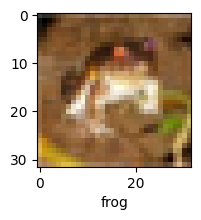

In [17]:
plot_sample(x_train , y_train , 0)

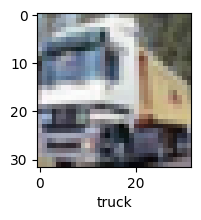

In [18]:
plot_sample(x_train , y_train , 1)

In [72]:
x_train = x_train / 255
x_test = x_test /255

In [20]:
### ANN 

In [73]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
ann = models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000 , activation = 'relu') ,
    keras.layers.Dense(1000 , activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

ann.compile( optimizer = 'SGD' , loss = 'SparseCategoricalCrossentropy' , metrics = ['accuracy'])

ann.fit(x_train , y_train , epochs = 2 )

Epoch 1/2
1563/1563 [==============================] - 106s 55ms/step - loss: 1.8132 - accuracy: 0.3556
Epoch 2/2
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6250 - accuracy: 0.4282


In [24]:
ann.evaluate(x_test , y_test)

313/313 [==============================] - 12s 16ms/step - loss: 1.5897 - accuracy: 0.4302


[1.5896596908569336, 0.4302000105381012]

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [27]:
y_pred = ann.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [39]:
y_pred[:5]

array([[0.46623394, 0.44066763, 0.7622191 , 0.85893387, 0.30915388,
        0.8168447 , 0.7364606 , 0.1505673 , 0.5477979 , 0.16157255],
       [0.83769864, 0.85092926, 0.280028  , 0.22145924, 0.16390404,
        0.10226417, 0.04072957, 0.2768932 , 0.9538954 , 0.97806424],
       [0.9202512 , 0.79167706, 0.37420565, 0.22353734, 0.21531956,
        0.16562803, 0.01373144, 0.3458022 , 0.958204  , 0.9445047 ],
       [0.9168831 , 0.49321386, 0.68263894, 0.40853533, 0.38335812,
        0.24763693, 0.05658901, 0.5337645 , 0.880988  , 0.6220407 ],
       [0.30718303, 0.11538775, 0.7975271 , 0.65007216, 0.8571214 ,
        0.7436901 , 0.7785466 , 0.62372756, 0.32826227, 0.1610064 ]],
      dtype=float32)

In [34]:
#y_test = y_test.reshape(-1,1)

In [40]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [36]:
ann.evaluate(x_test , y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.5897 - accuracy: 0.4302


[1.5896596908569336, 0.4302000105381012]

In [41]:
np.argmax(y_pred , axis = 1)

array([3, 9, 8, ..., 5, 5, 7], dtype=int64)

In [44]:
Y_pred_class = np.argmax(y_pred , axis = 1) 

In [48]:
y_test , Y_pred_class

(array([[3],
        [8],
        [8],
        ...,
        [5],
        [1],
        [7]], dtype=uint8),
 array([3, 9, 8, ..., 5, 5, 7], dtype=int64))

In [47]:
print(classification_report(y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.48      0.56      0.51      1000
           1       0.68      0.30      0.41      1000
           2       0.31      0.40      0.35      1000
           3       0.34      0.21      0.26      1000
           4       0.61      0.12      0.20      1000
           5       0.30      0.48      0.37      1000
           6       0.49      0.46      0.47      1000
           7       0.47      0.55      0.50      1000
           8       0.60      0.55      0.57      1000
           9       0.41      0.69      0.51      1000

    accuracy                           0.43     10000
   macro avg       0.47      0.43      0.42     10000
weighted avg       0.47      0.43      0.42     10000



### convolutional layer 

In [82]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation='relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense 
    layers.Flatten(),
    keras.layers.Dense(1000 , activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')  ## normalize probabilities b/w 0 to 1 
])

In [83]:
cnn.compile( optimizer = 'adam' , loss = 'SparseCategoricalCrossentropy' , metrics = ['accuracy'])

In [84]:
cnn.fit(x_train , y_train , epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 64s 39ms/step - loss: 1.3785 - accuracy: 0.5047
Epoch 2/2
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9930 - accuracy: 0.6521


In [76]:
cnn_smaller = models.Sequential([
    
    #cnn
    layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation='relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # dense 
    layers.Flatten(),
    keras.layers.Dense(1000 , activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')  ## normalize probabilities b/w 0 to 1 
])

In [77]:
cnn_smaller.compile( optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [93]:
#x_train[:5]

In [56]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [79]:
cnn_smaller.fit(x_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3290 - accuracy: 0.5306
Epoch 2/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.2285 - accuracy: 0.5698
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1543 - accuracy: 0.5994
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0909 - accuracy: 0.6195
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0314 - accuracy: 0.6433


In [85]:
cnn_smaller.evaluate(x_test ,y_test) 

313/313 [==============================] - 6s 16ms/step - loss: 1.1448 - accuracy: 0.5975


[1.144821047782898, 0.5975000262260437]

In [86]:
#Y_pred_cnn = cnn_smaller.predict(x_test)

In [87]:
Y_pred_cnn = cnn_smaller.predict(x_test)

313/313 [==============================] - 35s 17ms/step


In [89]:
y_pred_cnn_class = np.argmax(Y_pred_cnn ,  axis= 1 )

In [90]:
print(classification_report(y_test , y_pred_cnn_class ))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1000
           1       0.56      0.87      0.68      1000
           2       0.52      0.48      0.50      1000
           3       0.51      0.26      0.35      1000
           4       0.65      0.40      0.50      1000
           5       0.59      0.42      0.49      1000
           6       0.52      0.82      0.63      1000
           7       0.58      0.75      0.65      1000
           8       0.77      0.71      0.74      1000
           9       0.67      0.57      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.58     10000
weighted avg       0.60      0.60      0.58     10000



In [91]:
y_test = y_test.reshape(-1 , )

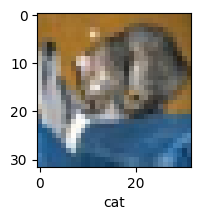

In [99]:
plot_sample(x_test , y_test , 0)

In [96]:
y_pred_cnn_class.shape

(10000,)

In [100]:
classes[y_pred_cnn_class[0]]

'cat'

In [102]:
print(classification_report(y_test , y_pred_cnn_class ))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1000
           1       0.56      0.87      0.68      1000
           2       0.52      0.48      0.50      1000
           3       0.51      0.26      0.35      1000
           4       0.65      0.40      0.50      1000
           5       0.59      0.42      0.49      1000
           6       0.52      0.82      0.63      1000
           7       0.58      0.75      0.65      1000
           8       0.77      0.71      0.74      1000
           9       0.67      0.57      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.58     10000
weighted avg       0.60      0.60      0.58     10000



In [101]:
### cnn computation is less and accuracy is better 

In [103]:
### formuala

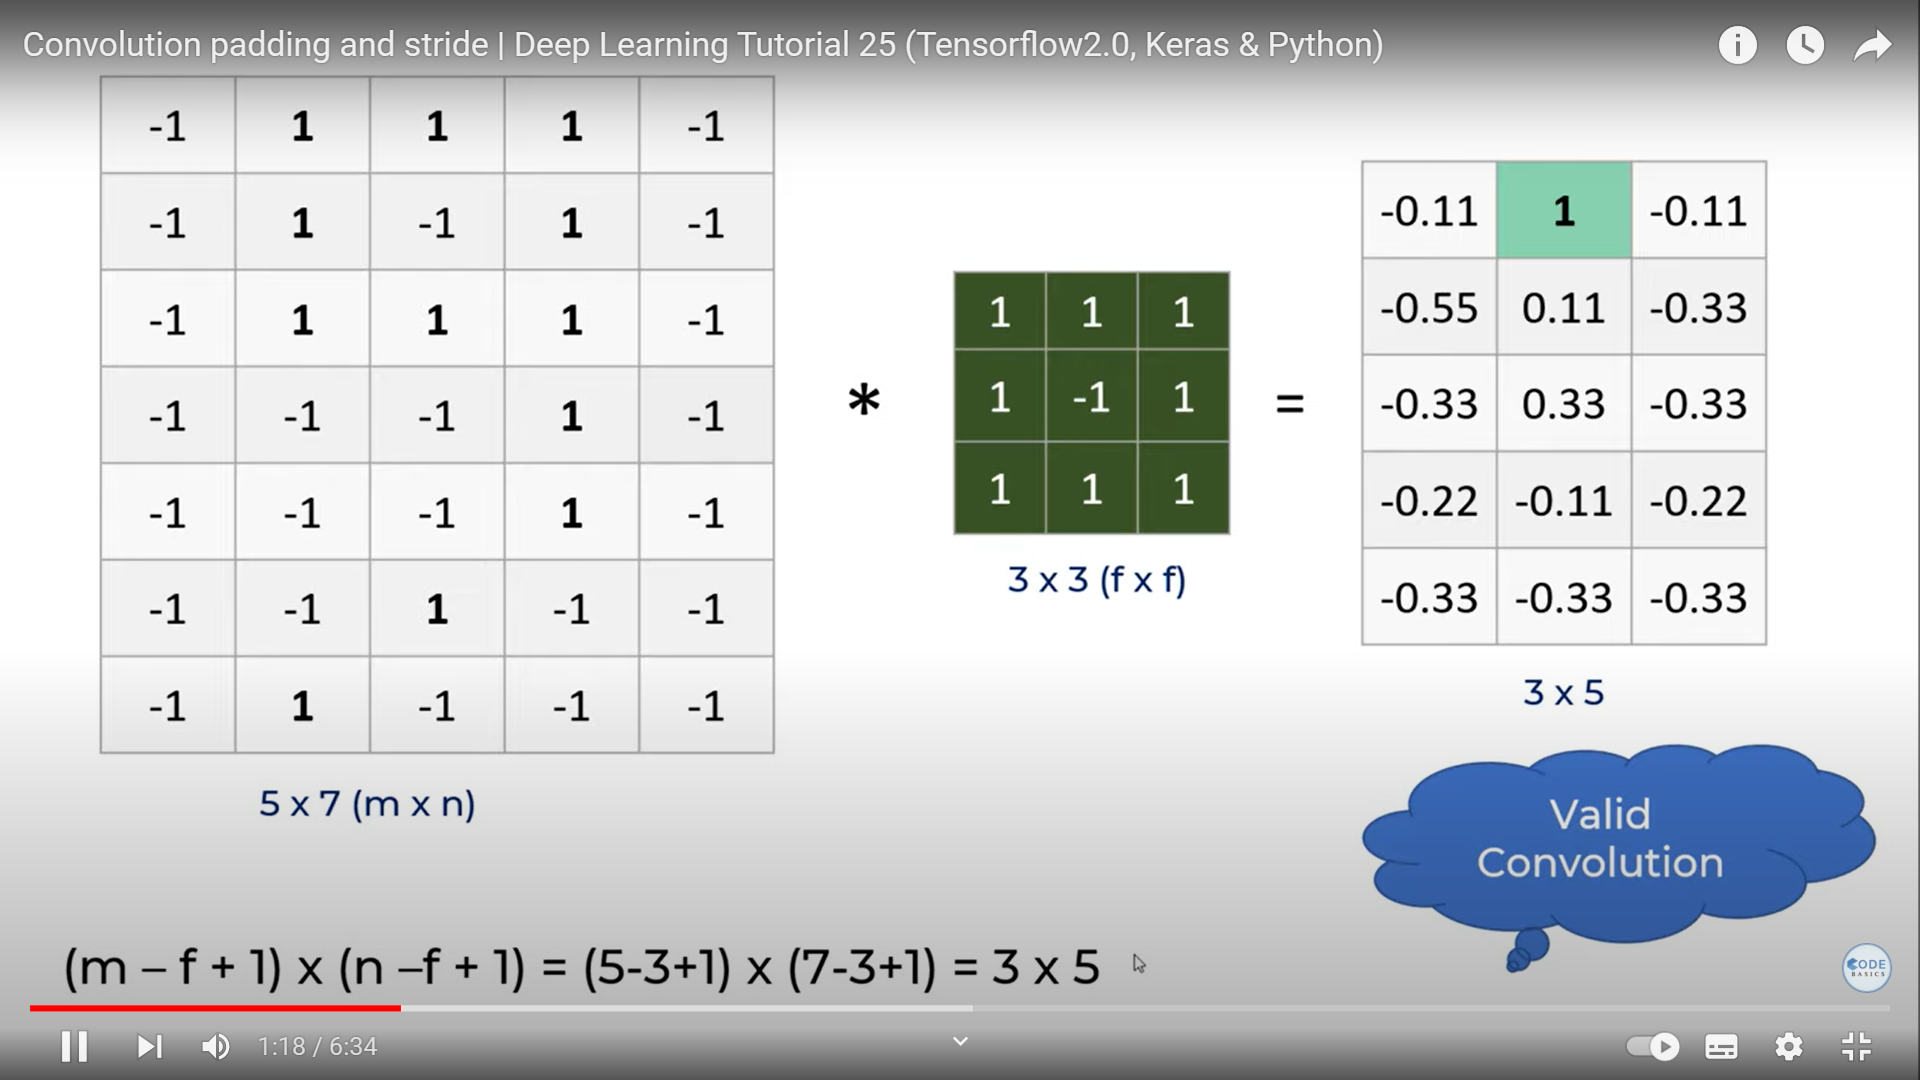 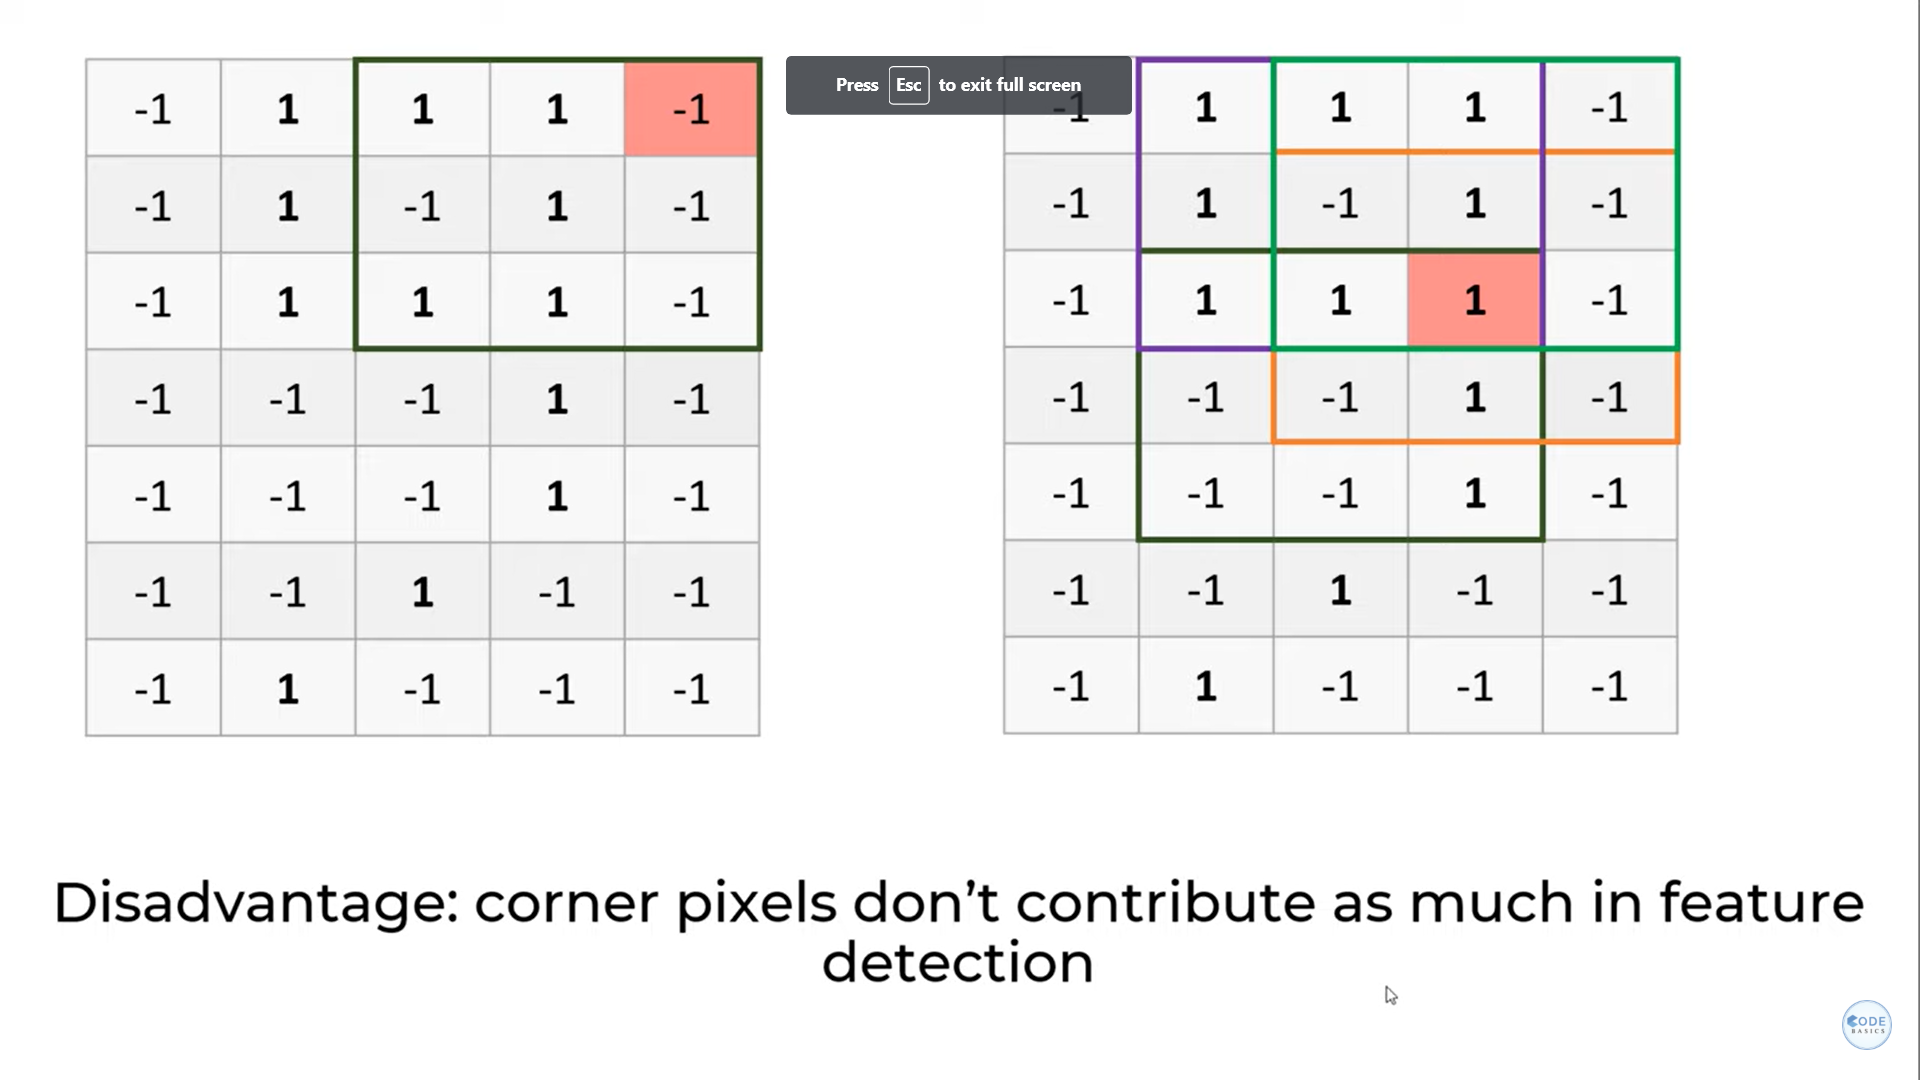

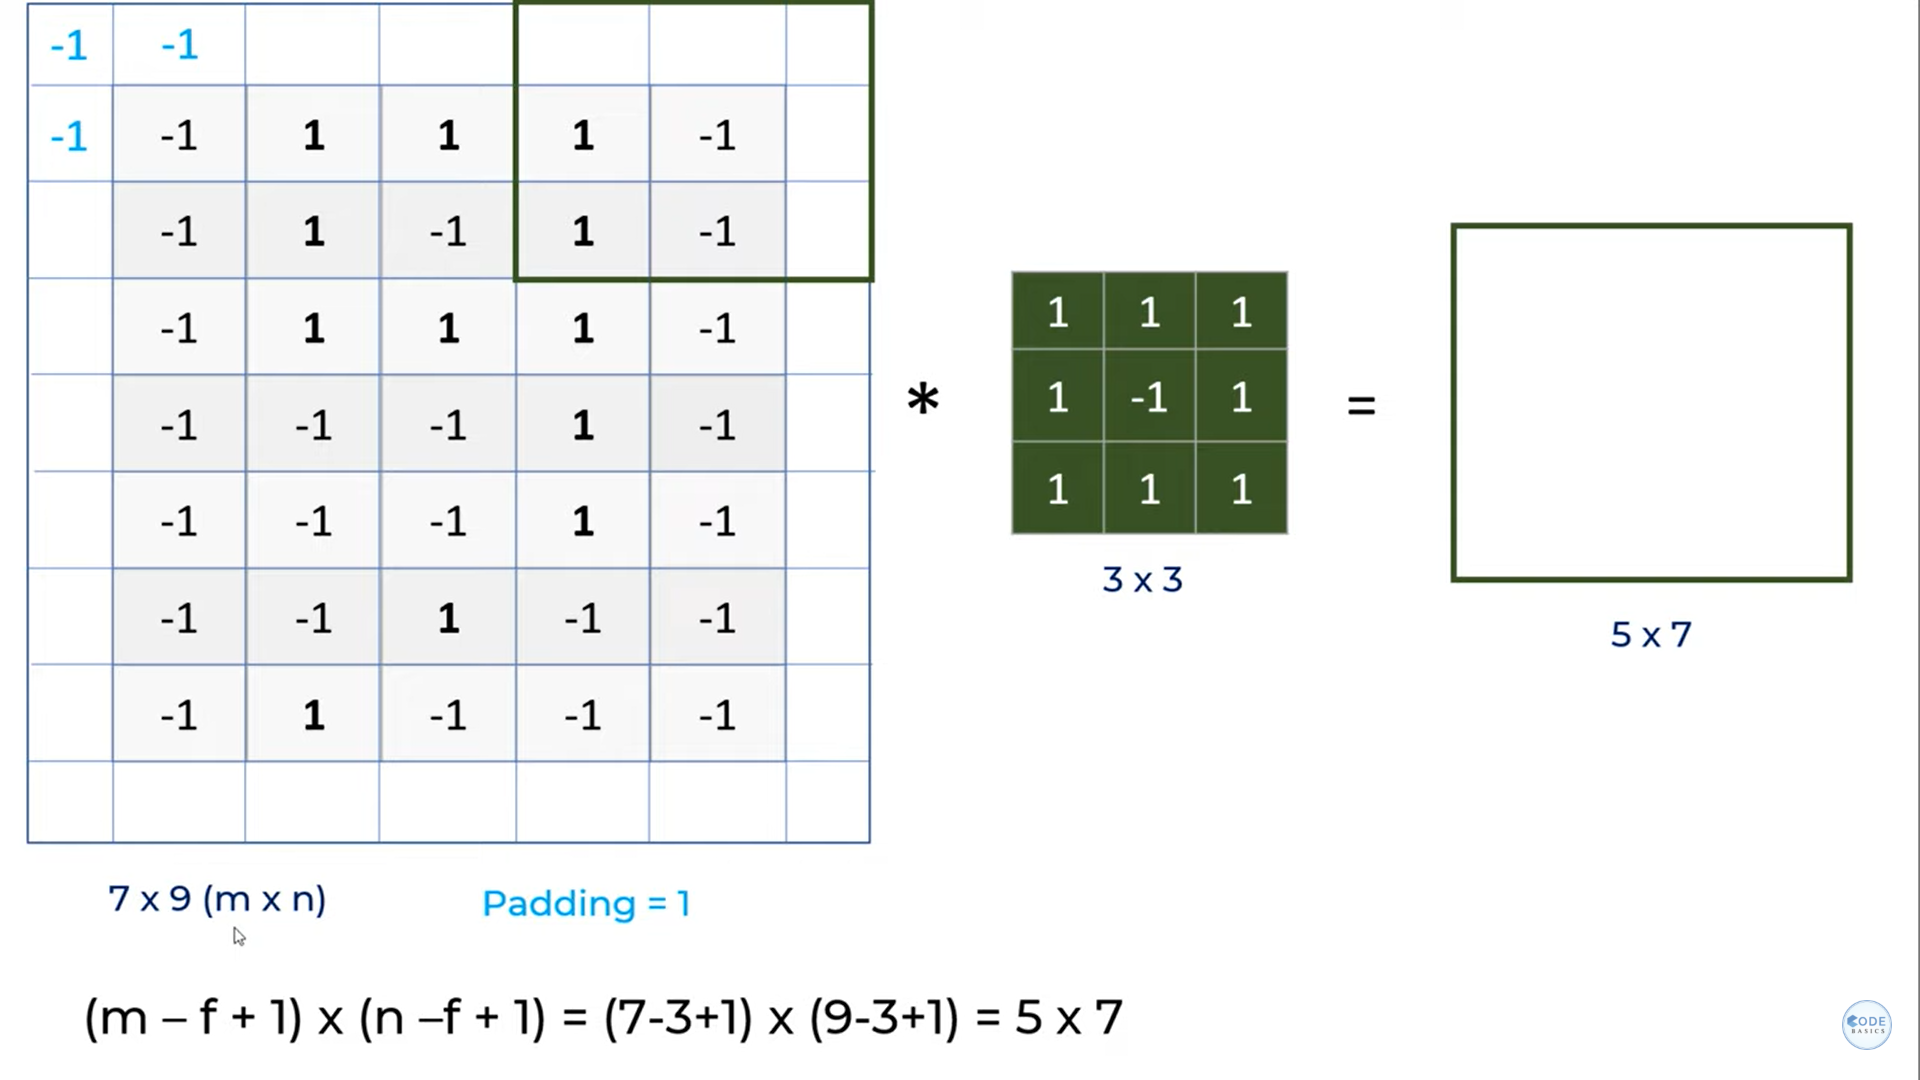 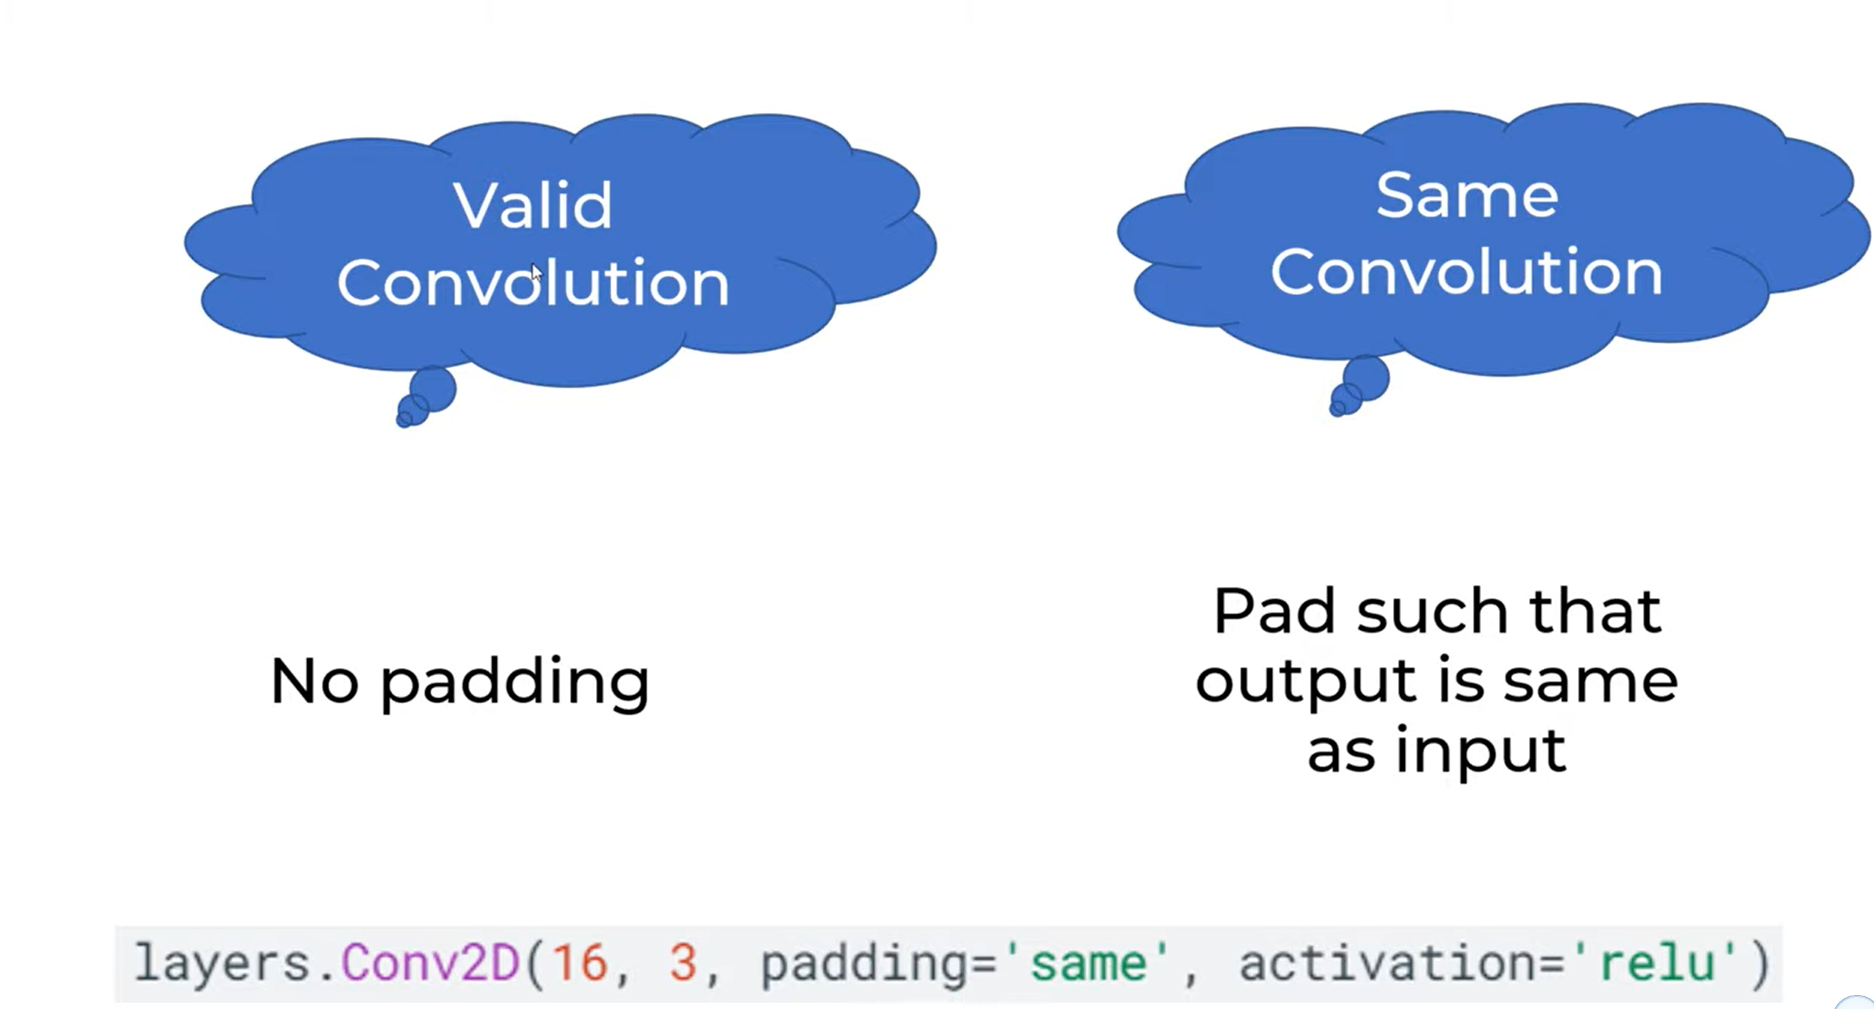

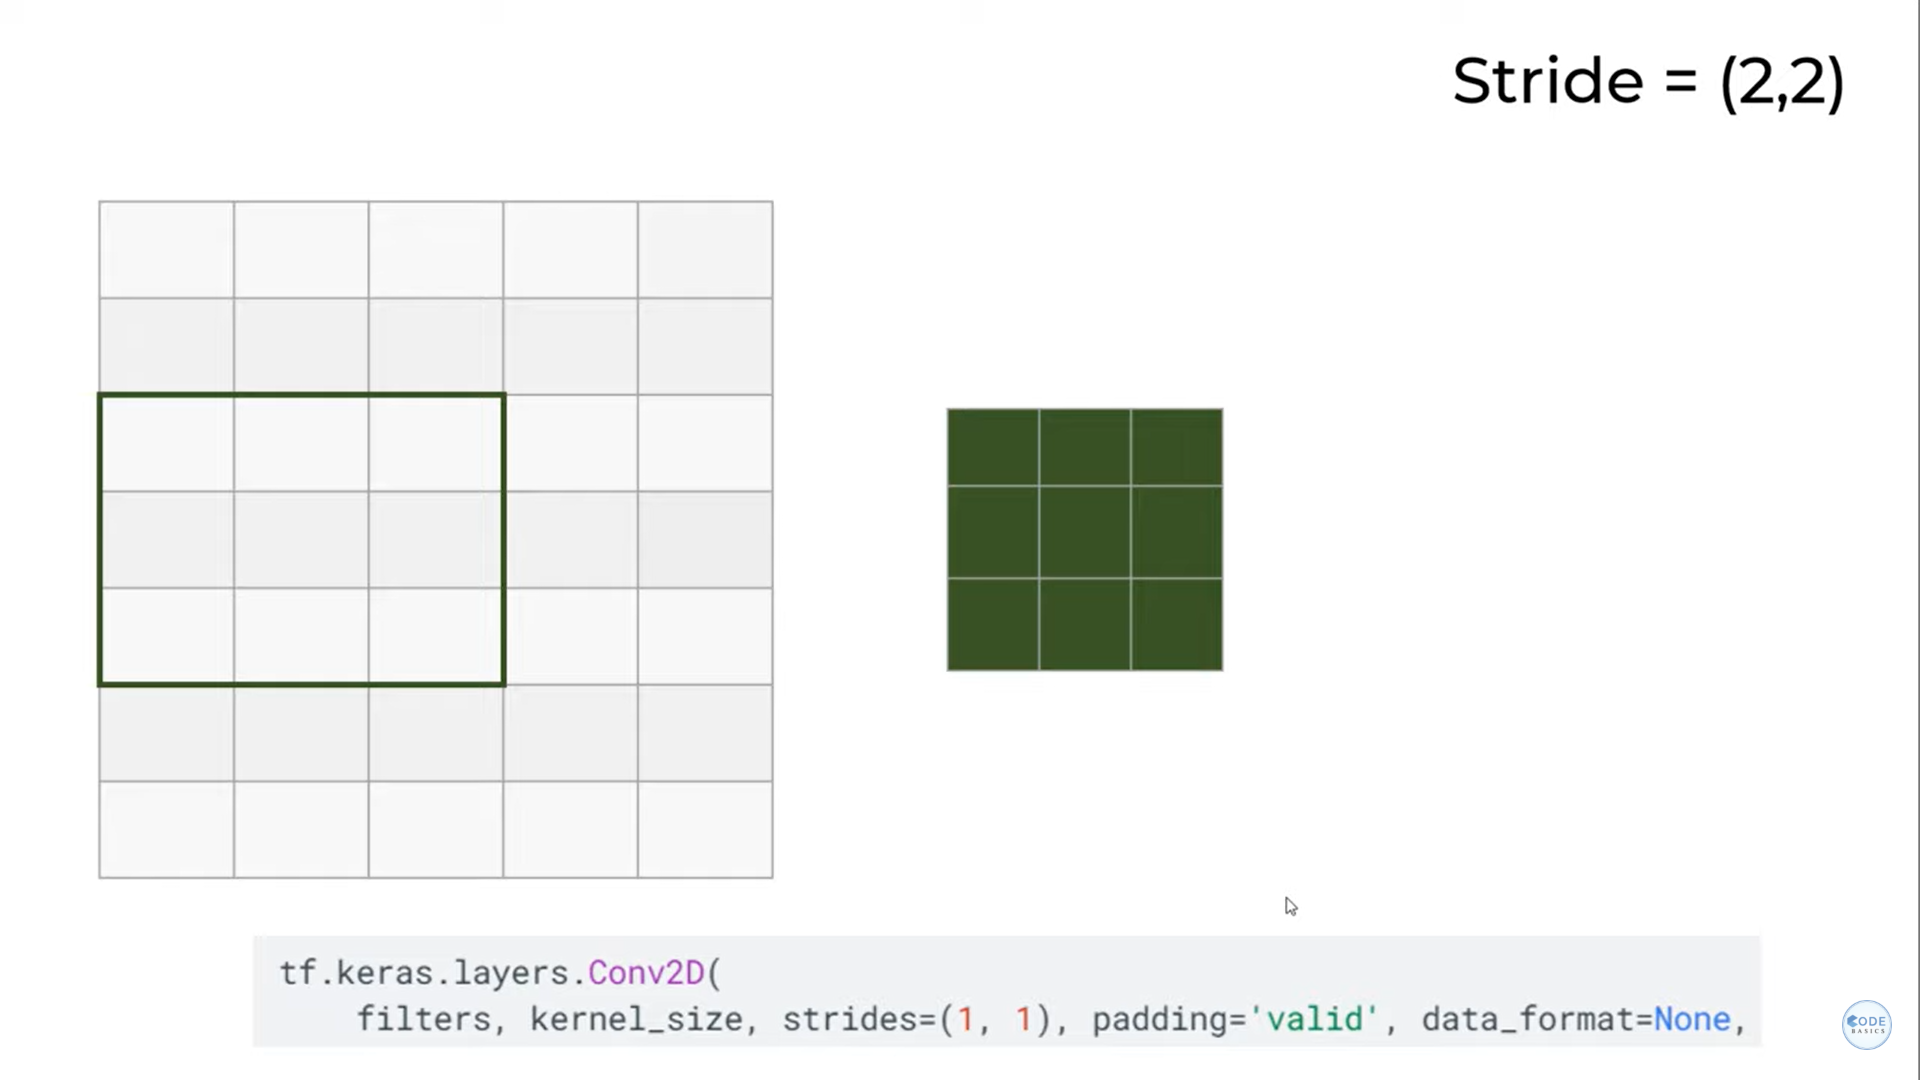